<a href="https://colab.research.google.com/github/GuillermoBastian/LatamProject/blob/main/Kiwi_Challenge(Gray).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys

import tensorflow as tf
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

tf.random.set_seed(123)

In [2]:
import pdb

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/Kiwi/lidar-cams-dataset/lidar-cams-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: lidar-cams-dataset/video_mapping_back_depth_map_1642032067806.png  
  inflating: lidar-cams-dataset/video_mapping_left_depth_map_1642032072006.png  
  inflating: lidar-cams-dataset/video_mapping_back_depth_map_1642032075021.png  
  inflating: lidar-cams-dataset/video_mapping_back_image_1642032078047.jpg  
  inflating: lidar-cams-dataset/video_mapping_right_depth_map_1642032084211.png  
  inflating: lidar-cams-dataset/video_mapping_right_depth_map_1642032085389.png  
  inflating: lidar-cams-dataset/video_mapping_right_depth_map_1642032086394.png  
  inflating: lidar-cams-dataset/camera_color_image_raw_image_1642032090391.jpg  
  inflating: lidar-cams-dataset/video_mapping_back_depth_map_1642032095018.png  
  inflating: lidar-cams-dataset/camera_color_image_raw_image_1642032097196.jpg  
  inflating: lidar-cams-dataset/video_mapping_back_depth_map_1642032098181.png  
  inflating: lidar-cams-dataset/video_mapping_back_image_16

# 0.- Check the folder

In [5]:
cols = ['left_image', 'right_image',
       'front_image', 'back_image', 'pos_x', 'pos_y',
       'pos_z', 'quat_x', 'quat_y', 'quat_z', 'quat_w', 'vel_x', 'vel_y',
       'vel_z', 'ang_vel_x', 'ang_vel_y', 'ang_vel_z', 'acc_x', 'acc_y',
       'acc_z', 'ang_x', 'ang_y', 'ang_z', 'quat_x_imu', 'quat_y_imu',
       'quat_z_imu', 'quat_w_imu', 'timestamp',
       'back_depth_image', 'right_depth_image',
       'left_depth_image', 'front_depth_image',
       'lat', 'lon', 'roll', 'pitch', 'yaw']

df = pd.read_csv(r"lidar-cams-dataset/metadata.csv")
df.columns = cols
df.head(3)


,left_image,right_image,front_image,back_image,pos_x,pos_y,pos_z,quat_x,quat_y,quat_z,...,timestamp,back_depth_image,right_depth_image,left_depth_image,front_depth_image,lat,lon,roll,pitch,yaw
0,video_mapping_left_image_1642547234833.jpg,video_mapping_right_image_1642547234915.jpg,camera_color_image_raw_image_1642547234869.jpg,video_mapping_back_image_1642547234852.jpg,-62.572842,-223.608342,0.0,-0.016309,0.001048,0.375159,...,1642547234874,video_mapping_back_depth_map_1642547234874.png,video_mapping_right_depth_map_1642547234874.png,video_mapping_left_depth_map_1642547234874.png,camera_color_image_raw_depth_map_1642547234874...,NaN,NaN,NaN,NaN,NaN
1,video_mapping_left_image_1642547235194.jpg,video_mapping_right_image_1642547235169.jpg,camera_color_image_raw_image_1642547235135.jpg,video_mapping_back_image_1642547235234.jpg,-62.572842,-223.608342,0.0,-0.016309,0.001048,0.375159,...,1642547235189,video_mapping_back_depth_map_1642547235189.png,video_mapping_right_depth_map_1642547235189.png,video_mapping_left_depth_map_1642547235189.png,camera_color_image_raw_depth_map_1642547235189...,33.969986,-118.416718,-0.009817,-0.094902,0.769036
2,video_mapping_left_image_1642547235565.jpg,video_mapping_right_image_1642547235538.jpg,camera_color_image_raw_image_1642547235469.jpg,video_mapping_back_image_1642547235473.jpg,-62.572842,-223.608342,0.0,-0.016309,0.001048,0.375159,...,1642547235515,video_mapping_back_depth_map_1642547235515.png,video_mapping_right_depth_map_1642547235515.png,video_mapping_left_depth_map_1642547235515.png,camera_color_image_raw_depth_map_1642547235515...,33.969986,-118.416718,-0.009817,-0.094902,0.769036


<Figure size 2160x2160 with 0 Axes>

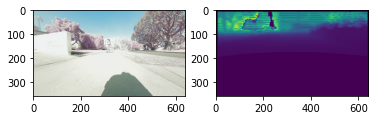

In [6]:
img_nro = 6000
dir1= "lidar-cams-dataset/" + df["back_image"][img_nro]
dir2 = "lidar-cams-dataset/" + df["front_depth_image"][img_nro]
col_img = cv2.imread(dir1)
depth_img = cv2.imread(dir2,cv2.IMREAD_GRAYSCALE)
col_img= cv2.cvtColor(col_img, cv2.COLOR_BGR2RGB)
#depth_img= cv2.cvtColor(depth_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,30))

#subplot(r,c) provide the no. of rows and columns

f, axarr = plt.subplots(1,2) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(col_img)
axarr[1].imshow(depth_img)

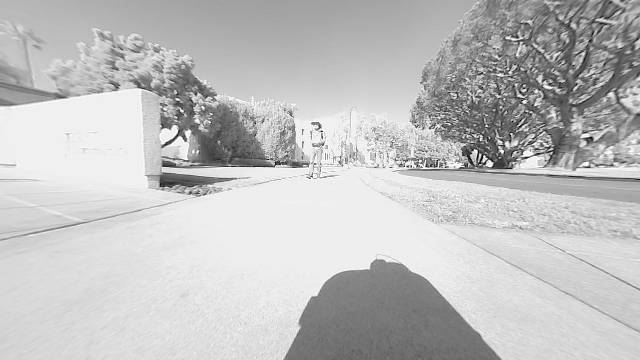

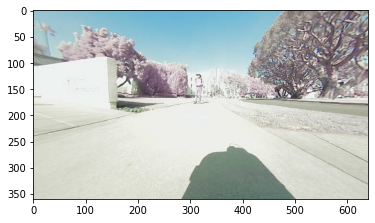

In [7]:
#let's check it bigger!
from google.colab.patches import cv2_imshow
plt.imshow(col_img)
gray = cv2.cvtColor(col_img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

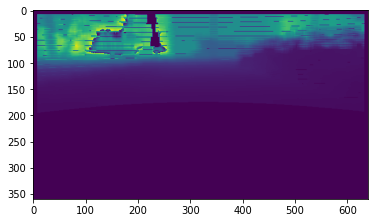

In [8]:
#let's check it bigger! x2
plt.imshow(depth_img)

# 1.- Collect Data

In [9]:
#cols = ["left_image", "left_depth_image"]
cols = ['left_image', 'right_image',
       'front_image', 'back_image', 
       'back_depth_image', 'right_depth_image',
       'left_depth_image', 'front_depth_image']

suffled_df = df.sample(frac = 1) #sin re ordenar
simple_df = suffled_df[cols]
simple_df.head(3)

,left_image,right_image,front_image,back_image,back_depth_image,right_depth_image,left_depth_image,front_depth_image
5129,video_mapping_left_image_1642544771856.jpg,video_mapping_right_image_1642544771830.jpg,camera_color_image_raw_image_1642544771868.jpg,video_mapping_back_image_1642544771903.jpg,video_mapping_back_depth_map_1642544771870.png,video_mapping_right_depth_map_1642544771870.png,video_mapping_left_depth_map_1642544771870.png,camera_color_image_raw_depth_map_1642544771870...
2418,video_mapping_left_image_1642545883119.jpg,video_mapping_right_image_1642545883066.jpg,camera_color_image_raw_image_1642545883113.jpg,video_mapping_back_image_1642545883149.jpg,video_mapping_back_depth_map_1642545883110.png,video_mapping_right_depth_map_1642545883110.png,video_mapping_left_depth_map_1642545883110.png,camera_color_image_raw_depth_map_1642545883110...
15829,video_mapping_left_image_1642030406613.jpg,video_mapping_right_image_1642030406675.jpg,camera_color_image_raw_image_1642030406628.jpg,video_mapping_back_image_1642030406713.jpg,video_mapping_back_depth_map_1642030406662.png,video_mapping_right_depth_map_1642030406662.png,video_mapping_left_depth_map_1642030406662.png,camera_color_image_raw_depth_map_1642030406662...


In [10]:
total_rows = len(simple_df) 
train_rows = int(0.7*total_rows)
val_rows = int(0.2*total_rows) + train_rows
test_rows = total_rows

train_df=simple_df[0:train_rows]
val_df=simple_df[train_rows:val_rows]
test_df=simple_df[val_rows:test_rows]

val_df = val_df.reset_index()
test_df = test_df.reset_index()
del val_df['index']
del test_df['index']

print("train nro:", len(train_df))
print("val nro:", len(val_df))
print("test nro:", len(test_df))

print("Coloured image shape:", col_img.shape)
print("Depth image shape:",depth_img.shape)



train nro: 13358
val nro: 3816
test nro: 1910
Coloured image shape: (360, 640, 3)
Depth image shape: (360, 640)


In [11]:
train_df.head()

,left_image,right_image,front_image,back_image,back_depth_image,right_depth_image,left_depth_image,front_depth_image
5129,video_mapping_left_image_1642544771856.jpg,video_mapping_right_image_1642544771830.jpg,camera_color_image_raw_image_1642544771868.jpg,video_mapping_back_image_1642544771903.jpg,video_mapping_back_depth_map_1642544771870.png,video_mapping_right_depth_map_1642544771870.png,video_mapping_left_depth_map_1642544771870.png,camera_color_image_raw_depth_map_1642544771870...
2418,video_mapping_left_image_1642545883119.jpg,video_mapping_right_image_1642545883066.jpg,camera_color_image_raw_image_1642545883113.jpg,video_mapping_back_image_1642545883149.jpg,video_mapping_back_depth_map_1642545883110.png,video_mapping_right_depth_map_1642545883110.png,video_mapping_left_depth_map_1642545883110.png,camera_color_image_raw_depth_map_1642545883110...
15829,video_mapping_left_image_1642030406613.jpg,video_mapping_right_image_1642030406675.jpg,camera_color_image_raw_image_1642030406628.jpg,video_mapping_back_image_1642030406713.jpg,video_mapping_back_depth_map_1642030406662.png,video_mapping_right_depth_map_1642030406662.png,video_mapping_left_depth_map_1642030406662.png,camera_color_image_raw_depth_map_1642030406662...
10567,video_mapping_left_image_1642032883013.jpg,video_mapping_right_image_1642032883044.jpg,camera_color_image_raw_image_1642032883028.jpg,video_mapping_back_image_1642032883068.jpg,video_mapping_back_depth_map_1642032883028.png,video_mapping_right_depth_map_1642032883028.png,video_mapping_left_depth_map_1642032883028.png,camera_color_image_raw_depth_map_1642032883028...
7164,video_mapping_left_image_1642542545131.jpg,video_mapping_right_image_1642542545095.jpg,camera_color_image_raw_image_1642542545087.jpg,video_mapping_back_image_1642542545183.jpg,video_mapping_back_depth_map_1642542545126.png,video_mapping_right_depth_map_1642542545126.png,video_mapping_left_depth_map_1642542545126.png,camera_color_image_raw_depth_map_1642542545126...


# 1.1 Data generator

In [12]:
class DepthDataGenerator(tf.keras.utils.Sequence):
  #n_channels = 3 | CHANGE_002
  def __init__(self, data, batch_size=6, dim=(360, 640), n_channels=1, split='train', shuffle=True): #300 900
    #Parameter values: si entra
    self.data = data
    self.indices = self.data.index.tolist()
    self.dim = dim
    self.n_channels = n_channels
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.split = split
    self.on_epoch_end()

  def merge_all_images(self, front, right, left, back, flag=None):
    #pdb.set_trace()
    #adjust front
    pxls2move=60
    #pdb.set_trace()
    if flag:
      #pdb.set_trace()
      if len(front.shape) == 3: 
        dummy = np.zeros((pxls2move,front.shape[1],front.shape[2]))
      else:
        dummy = np.zeros((pxls2move,front.shape[1],1))

      front = front[:-pxls2move, :]
      front = np.concatenate((dummy, front), axis=0)
        
    #merge
    up_half_img = np.concatenate((front, back), axis=1)  
    down_half_img = np.concatenate((right, left), axis=1)  
    
    down_half_img = cv2.rotate(down_half_img, cv2.ROTATE_90_CLOCKWISE)
    down_half_img = cv2.rotate(down_half_img, cv2.ROTATE_90_CLOCKWISE)

    if len(down_half_img.shape) == 2: #add dimension loss during rotation
      down_half_img = np.expand_dims(down_half_img, axis=2)
    
    merged_image = np.concatenate((up_half_img, down_half_img), axis=0)
    merged_image = cv2.resize(merged_image, self.dim)

    if len(merged_image.shape) == 2: #add dimension loss during rotation
      merged_image = np.expand_dims(merged_image, axis=2)  

    return merged_image

  def load(self, image_path, depth_map_path = None):
    #Load & Pre process 
    #pdb.set_trace()
    image_path =  "lidar-cams-dataset/" + image_path

    if depth_map_path:
      depth_map_path = "lidar-cams-dataset/" + depth_map_path
    
    image_ = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    #image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB) #CHANGE_002
    
    if (self.split == 'train' or self.split == 'val'):
      #depthmap = np.load(depth_map_path)['arr_0']
      #Enhacement_1
      depth_map = cv2.imread(depth_map_path ,cv2.IMREAD_GRAYSCALE)
      depth_map = np.array(depth_map)/255.0
        
      if ((self.dim[0] < image_.shape[0]) and (self.dim[1] < image_.shape[1]) and False):
        #crop randomly at the center
        max_x = image_.shape[1] - self.dim[1]
        max_y = image_.shape[0] - self.dim[0]
        
        x = np.random.randint(0, max_x)
        y = np.random.randint(0, max_y)

        image_ = image_[y: y + self.dim[0], x: x + self.dim[1]]
        depth_map = depth_map[y: y + self.dim[0], x: x + self.dim[1]]
      
      else:
        #resize image
        depth_map = cv2.resize(depth_map, self.dim)
        image_ = cv2.resize(image_, self.dim)    

      #expand to make single channel depth map
      depth_map = np.expand_dims(depth_map, axis=2)
      
      #convert to tensor
      #pdb.set_trace()
      if len(image_.shape) == 2: #add dimension loss during rotation
        image_ = np.expand_dims(image_, axis=2) 
      image_ = tf.image.convert_image_dtype(image_, tf.float32)
      depth_map = tf.image.convert_image_dtype(depth_map, tf.float32)
 
      return image_, depth_map

    else:
      image_= cv2.resize(image_, self.dim)
      if len(image_.shape) == 2: #add dimension loss during rotation
        image_ = np.expand_dims(image_, axis=2)
      #no depth maps for test
      image_ = tf.image.convert_image_dtype(image_, tf.float32)
      
      return image_

  def data_generation(self, batch):
    #pdb.set_trace()
    x = np.empty((self.batch_size, *self.dim, self.n_channels))
    m = np.empty((self.batch_size, *self.dim, self.n_channels))
    o = np.empty((self.batch_size, *self.dim, self.n_channels))
    r = np.empty((self.batch_size, *self.dim, self.n_channels))
    tot_col = np.empty((self.batch_size, *self.dim, self.n_channels))

    y = np.empty((self.batch_size, *self.dim, 1))
    n = np.empty((self.batch_size, *self.dim, 1))
    p = np.empty((self.batch_size, *self.dim, 1))
    s = np.empty((self.batch_size, *self.dim, 1))
    tot_dep = np.empty((self.batch_size, *self.dim, 1))
    

    if self.split == 'train' or self.split == 'val':
      #load data from batches
      # for i, batch_id in enumerate(batch):
      #   x[i,], y[i,] = self.load(
      #     self.data["left_image"][batch_id], #modificar
      #     self.data["left_depth_image"][batch_id], #modificar
      #     )
      #Enhacement_2
      #pdb.set_trace()
      for i, batch_id in enumerate(batch):
        x[i,], y[i,] = self.load(
          self.data["left_image"][batch_id], 
          self.data["left_depth_image"][batch_id], 
          )
      for i, batch_id in enumerate(batch):
        m[i,], n[i,] = self.load(
          self.data["right_image"][batch_id], 
          self.data["right_depth_image"][batch_id],
        )
      for i, batch_id in enumerate(batch):
        o[i,], p[i,] = self.load(
          self.data["front_image"][batch_id], 
          self.data["front_depth_image"][batch_id],
          )
      for i, batch_id in enumerate(batch):
        r[i,], s[i,] = self.load(
          self.data["back_image"][batch_id], 
          self.data["back_depth_image"][batch_id],
          )
        
        #pdb.set_trace()
        
      for i in range(len(x)):
        a1 = self.merge_all_images(o[i], m[i], x[i], r[i], flag=None)

        b1 = self.merge_all_images(p[i], n[i], y[i], s[i], flag=1)

        tot_col[i] = a1
        tot_dep[i] = b1
        del a1,b1
          #front, right, left, back, flag=1 if depth map
        

        #cmap = plt.cm.jet
        #cmap.set_bad(color="black")
        #plt.imshow(x[0].squeeze())
        #plt.imshow(y[0].squeeze(), cmap=cmap)
      return tot_col, tot_dep
    
    else:
      #test:
      for i, batch_id in enumerate(batch):
        x[i,] = self.load(
          self.data["left_image"][batch_id], #modificar
        )
      for i, batch_id in enumerate(batch):
        m[i,] = self.load(
          self.data["right_image"][batch_id], #modificar
        )
      for i, batch_id in enumerate(batch):
        o[i,] = self.load(
          self.data["front_image"][batch_id], #modificar
        )
      for i, batch_id in enumerate(batch):
        r[i,] = self.load(
          self.data["back_image"][batch_id], #modificar
        )

      for i in range(len(x)):
        a1 = self.merge_all_images(o[i], m[i], x[i], r[i], flag=None)

        tot_col[i] = a1
        del a1
      return tot_col
        
  def on_epoch_end(self):
    #shuffle dataset after every epoch
    self.index = np.arange(len(self.indices))
    if self.shuffle == True:
      np.random.shuffle(self.index)
          
  def __len__(self):
    return int(np.ceil(len(self.data) / self.batch_size))

  def __getitem__(self, index):
    #pdb.set_trace()
    if (index + 1)*self.batch_size > len(self.indices):
      self.batch_size = len(self.indices) - index*self.batch_size
        
    #generate indices of the batch
    index = self.indices[index*self.batch_size: (index+1)*self.batch_size]

    #find list of IDs and get data using data generation fucntion
    batch = [self.indices[k] for k in index] #index 
    
    if ((self.split == 'train') or  (self.split == 'val')):
      x, y = self.data_generation(batch)
      #cmap = plt.cm.jet
      #cmap.set_bad(color="black")
      #plt.imshow(y[0].squeeze(), cmap=cmap)
      return x, y
    
    elif (self.split == 'get_gt'):
      x, y = self.data_generation(batch)
      #cmap = plt.cm.jet
      #cmap.set_bad(color="black")
      #plt.imshow(y[0].squeeze(), cmap=cmap)
      return y

    else:
      #no depth maps for test
      x=self.data_generation(batch)
      return x
      

In [13]:
#Hyperparameters
HEIGHT = 256
WIDTH = 256
LR = 0.0002
EPOCHS = 25
BATCH_SIZE = 64

## 1.2 Check dataset from generator

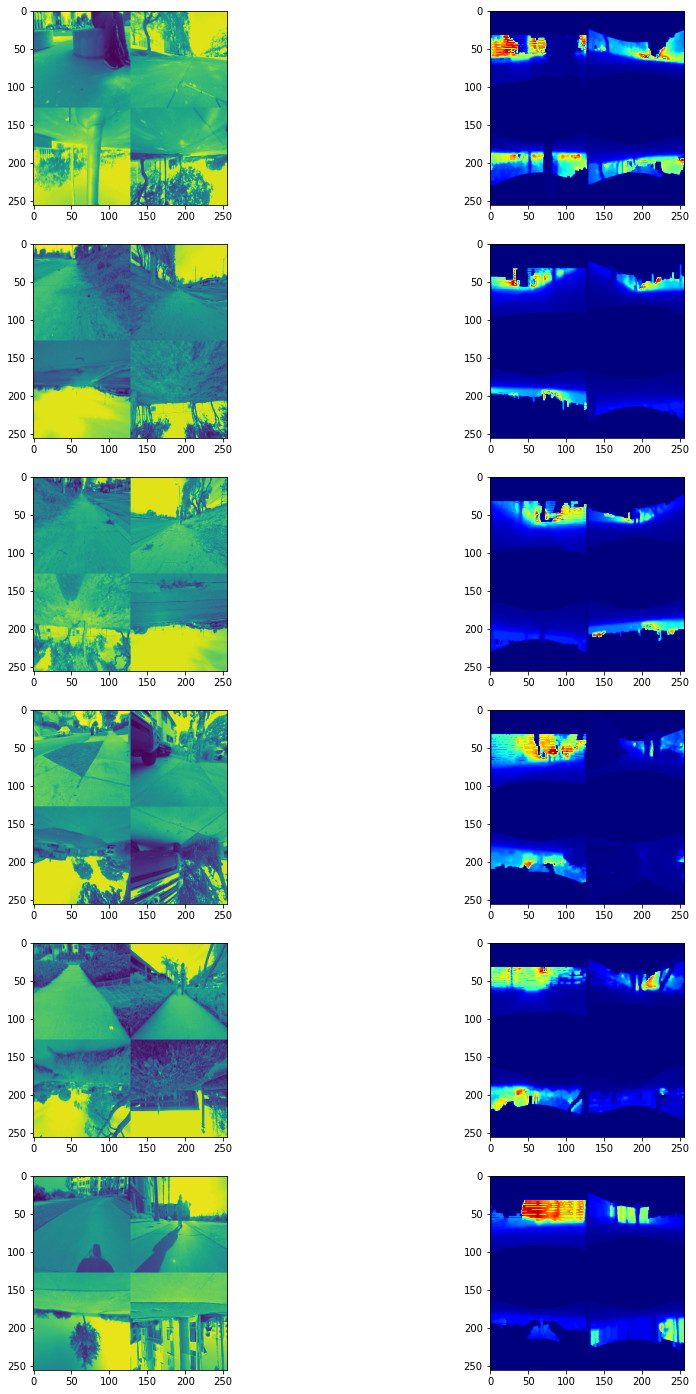

In [14]:
def visualize_depth_map(samples, model=None):
    #Get input/target from dataloader batch
    input, target = samples
    
    #set depth map plot color map
    cmap = plt.cm.jet
    cmap.set_bad(color="black")
    
    if model:
      pred=model.predict(input)
      fig, ax = plt.subplots(input.shape[0], 3, figsize=(15,25))
      
      for i in range(input.shape[0]):
        #plot image, lidar_image and prediction
        ax[i, 0].imshow((input[i].squeeze())) #checkear
        ax[i, 1].imshow((target[i].squeeze()))
        ax[i, 2].imshow((pred[i].squeeze()))
    else:
      fig, ax = plt.subplots(input.shape[0], 2, figsize = (15,25))
      for i in range(input.shape[0]):
          ax[i,0].imshow((input[i].squeeze()))
          ax[i,1].imshow((target[i].squeeze()), cmap=cmap)
          
visualize_samples = next(iter(DepthDataGenerator(data=simple_df, batch_size=6, dim=(HEIGHT, WIDTH), split='train')))
visualize_depth_map(visualize_samples)


IndexError: ignored

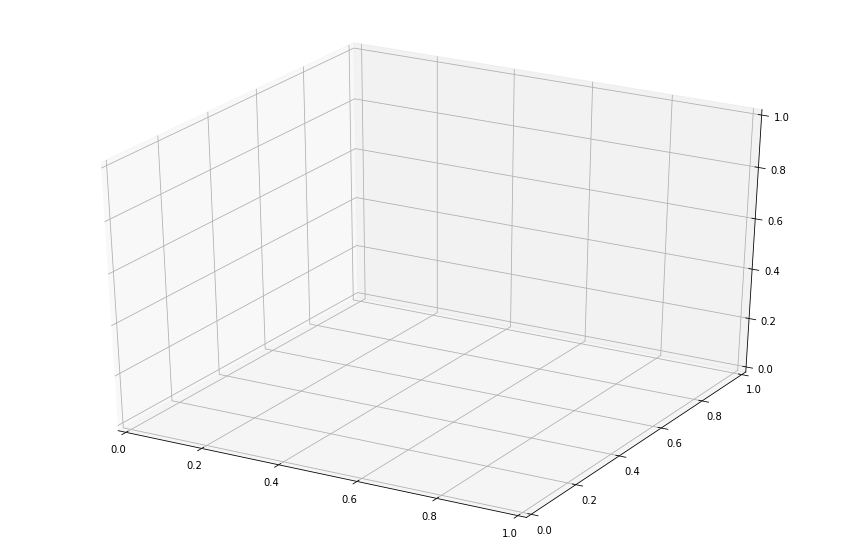

In [15]:
depth_vis = np.flipud(visualize_samples[1][1].squeeze())  # target
img_vis = np.flipud(visualize_samples[0][1].squeeze())  # input

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection="3d")

STEP = 3
for x in range(0, img_vis.shape[0], STEP):
    for y in range(0, img_vis.shape[1], STEP):
        ax.scatter(
            [depth_vis[x, y]] * 3,
            [y] * 3,
            [x] * 3,
            c=tuple(img_vis[x, y, :3] / 255),
            s=3,
        )
    ax.view_init(45, 135)

# 2.- Network architecture: U-Net

In [ ]:
class DownscaleBlock(layers.Layer):
    def __init__(
        self, filters, kernel_size=(3, 3), padding="same", strides=1, **kwargs
    ):
        super().__init__(**kwargs)
        self.convA = layers.Conv2D(filters, kernel_size, strides, padding)
        self.convB = layers.Conv2D(filters, kernel_size, strides, padding)
        self.reluA = layers.LeakyReLU(alpha=0.2)
        self.reluB = layers.LeakyReLU(alpha=0.2)
        self.bn2a = tf.keras.layers.BatchNormalization()
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.pool = layers.MaxPool2D((2, 2), (2, 2))

        self.drop1 = tf.keras.layers.Dropout(0.05) #add drop out 

    def call(self, input_tensor):
        d = self.convA(input_tensor)
        x = self.bn2a(d)
        x = self.reluA(x)
        x = self.drop1(x)

        x = self.convB(x)
        x = self.bn2b(x)
        x = self.reluB(x)

        x += d
        p = self.pool(x)
        return x, p


class UpscaleBlock(layers.Layer):
    def __init__(
        self, filters, kernel_size=(3, 3), padding="same", strides=1, **kwargs
    ):
        super().__init__(**kwargs)
        self.us = layers.UpSampling2D((2, 2))
        self.convA = layers.Conv2D(filters, kernel_size, strides, padding)
        self.convB = layers.Conv2D(filters, kernel_size, strides, padding)
        self.reluA = layers.LeakyReLU(alpha=0.2)
        self.reluB = layers.LeakyReLU(alpha=0.2)
        self.bn2a = tf.keras.layers.BatchNormalization()
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.drop1= tf.keras.layers.Dropout(0.05)
        self.conc = layers.Concatenate()

    def call(self, x, skip):
        x = self.us(x)
        concat = self.conc([x, skip])
        x = self.convA(concat)
        x = self.bn2a(x)
        x = self.reluA(x)
        x = self.drop1(x)

        x = self.convB(x)
        x = self.bn2b(x)
        x = self.reluB(x)

        return x


class BottleNeckBlock(layers.Layer):
    def __init__(
        self, filters, kernel_size=(3, 3), padding="same", strides=1, **kwargs
    ):
        super().__init__(**kwargs)
        self.convA = layers.Conv2D(filters, kernel_size, strides, padding)
        self.convB = layers.Conv2D(filters, kernel_size, strides, padding)
        self.reluA = layers.LeakyReLU(alpha=0.2)
        self.reluB = layers.LeakyReLU(alpha=0.2)

    def call(self, x):
        x = self.convA(x)
        x = self.reluA(x)
        x = self.convB(x)
        x = self.reluB(x)
        return x

In [ ]:
def get_loss(target, pred):
  #pdb.set_trace()
  ssim_loss_weight = 0.9 #0.85
  l1_loss_weight = 0.25 #0.1
  edge_loss_weight = 0.6 #0.9
  
  dy_true, dx_true = tf.image.image_gradients(target)
  dy_pred, dx_pred = tf.image.image_gradients(pred)

  #edge loss, getting image gradients
  weights_x = tf.exp(tf.reduce_mean(tf.abs(dx_true)))
  weights_y = tf.exp(tf.reduce_mean(tf.abs(dy_true)))
  
  #depth smoothness
  smoothness_x = dx_pred*weights_x
  smoothness_y = dy_pred*weights_y
  depth_smoothness_loss = tf.reduce_mean(abs(smoothness_x)) + tf.reduce_mean(
      abs(smoothness_y)
  )

  #structural similarity (SSIM) index
  ssim_loss = tf.reduce_mean(
      1
      - tf.image.ssim(
          target, pred, max_val = WIDTH, filter_size=7, k1=0.01 ** 2, k2=0.03 ** 2
      )
  )
  
  l1_loss = tf.reduce_mean(tf.abs(target-pred))

  loss = (
      (ssim_loss_weight * ssim_loss)
      + (edge_loss_weight * depth_smoothness_loss)
  )
  return loss

In [ ]:
class DepthEstimationModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.loss_metric = tf.keras.metrics.Mean(name="loss")
    f = [16, 32, 64, 128, 256]
    self.downscale_blocks = [
        DownscaleBlock(f[0]),
        DownscaleBlock(f[1]),
        DownscaleBlock(f[2]),
        DownscaleBlock(f[3]),
    ]
    self.bottle_neck_block = BottleNeckBlock(f[4])
    self.upscale_blocks = [
        UpscaleBlock(f[3]),
        UpscaleBlock(f[2]),
        UpscaleBlock(f[1]),
        UpscaleBlock(f[0]),
    ]
    self.conv_layer = layers.Conv2D(1, (1, 1), padding="same", activation="tanh")

    self.calculate_loss = get_loss

  @property
  def metrics(self):
    return [self.loss_metric]

  def train_step(self, batch_data):
    input, target = batch_data
    with tf.GradientTape() as tape:
      pred = self(input, training=True)
      loss = self.calculate_loss(target, pred)

    #Backpropagation
    gradients = tape.gradient(loss, self.trainable_variables)
    self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
    self.loss_metric.update_state(loss)
    return {
        "loss": self.loss_metric.result(),
    }

  def test_step(self, batch_data):
    input, target = batch_data

    pred = self(input, training=False)
    loss = self.calculate_loss(target, pred)

    self.loss_metric.update_state(loss)
    return {
        "loss": self.loss_metric.result(),
    }

  def call(self, x):
    c1, p1 = self.downscale_blocks[0](x)
    c2, p2 = self.downscale_blocks[1](p1)
    c3, p3 = self.downscale_blocks[2](p2)
    c4, p4 = self.downscale_blocks[3](p3)

    bn = self.bottle_neck_block(p4)

    u1 = self.upscale_blocks[0](bn, c4)
    u2 = self.upscale_blocks[1](u1, c3)
    u3 = self.upscale_blocks[2](u2, c2)
    u4 = self.upscale_blocks[3](u3, c1)

    return self.conv_layer(u4)

# 4. Train

In [ ]:
BATCH_SIZE = 64 #64
EPOCHS= 75 

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=7),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                                       save_weights_only=True, save_best_only=False
                                       ),
]

In [ ]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate = LR,
    amsgrad = False,
)

accuracy_thr = tf.keras.metrics.BinaryAccuracy(
    name='binary_accuracy', dtype=None, threshold=1.25
)

model = DepthEstimationModel()
# Define the loss function
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(
     from_logits=True, reduction="none"
)
# Compile the model
model.compile(optimizer, loss=cross_entropy)

train_loader = DepthDataGenerator(
    data=train_df.reset_index(drop="true"), batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH)
)
validation_loader = DepthDataGenerator(
    data=val_df.reset_index(drop="true"), batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH)
)
history = model.fit(
    train_loader,
    epochs=EPOCHS,
    validation_data=validation_loader,
    callbacks=my_callbacks,
)

Epoch 1/75
209/209 [==============================] - 577s 3s/step - loss: 0.4446 - val_loss: 0.2795
Epoch 2/75
209/209 [==============================] - 242s 1s/step - loss: 0.1734 - val_loss: 0.6389
Epoch 3/75
209/209 [==============================] - 95s 455ms/step - loss: 0.1986 - val_loss: 0.1212
Epoch 4/75
209/209 [==============================] - 88s 423ms/step - loss: 0.1363 - val_loss: 0.1204
Epoch 5/75
209/209 [==============================] - 88s 425ms/step - loss: 0.1285 - val_loss: 0.2898
Epoch 6/75
209/209 [==============================] - 88s 424ms/step - loss: 0.1202 - val_loss: 0.1112
Epoch 7/75
209/209 [==============================] - 88s 423ms/step - loss: 0.1072 - val_loss: 0.1084
Epoch 8/75
209/209 [==============================] - 88s 422ms/step - loss: 0.1018 - val_loss: 0.0932
Epoch 9/75
209/209 [==============================] - 88s 422ms/step - loss: 0.0967 - val_loss: 0.0909
Epoch 10/75
209/209 [==============================] - 88s 420ms/step - loss:

Text(0.5, 1.0, 'Loss Curve')

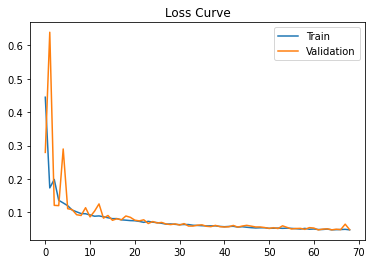

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(("Train","Validation"))
plt.title(("Loss Curve"))

In [ ]:
# Guardar el Modelo custom
model.save('/content/gdrive/MyDrive/Kiwi/Quad3_model_gray_image',save_format='tf')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kiwi/Quad3_model_gray_image/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kiwi/Quad3_model_gray_image/assets


In [ ]:

train_loader = DepthDataGenerator(
    data=train_df.reset_index(drop="true"), batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH)
)
validation_loader = DepthDataGenerator(
    data=val_df.reset_index(drop="true"), batch_size=BATCH_SIZE, dim=(HEIGHT, WIDTH)
)

# 5.- Predict Sample

In [17]:
#cargar modelo 
new_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Kiwi/Quad3_model_gray_image')

#model.load_weights('/content/model.02-0.20.h5')

In [ ]:
#results = new_model.evaluate(train_loader, batch_size=64)

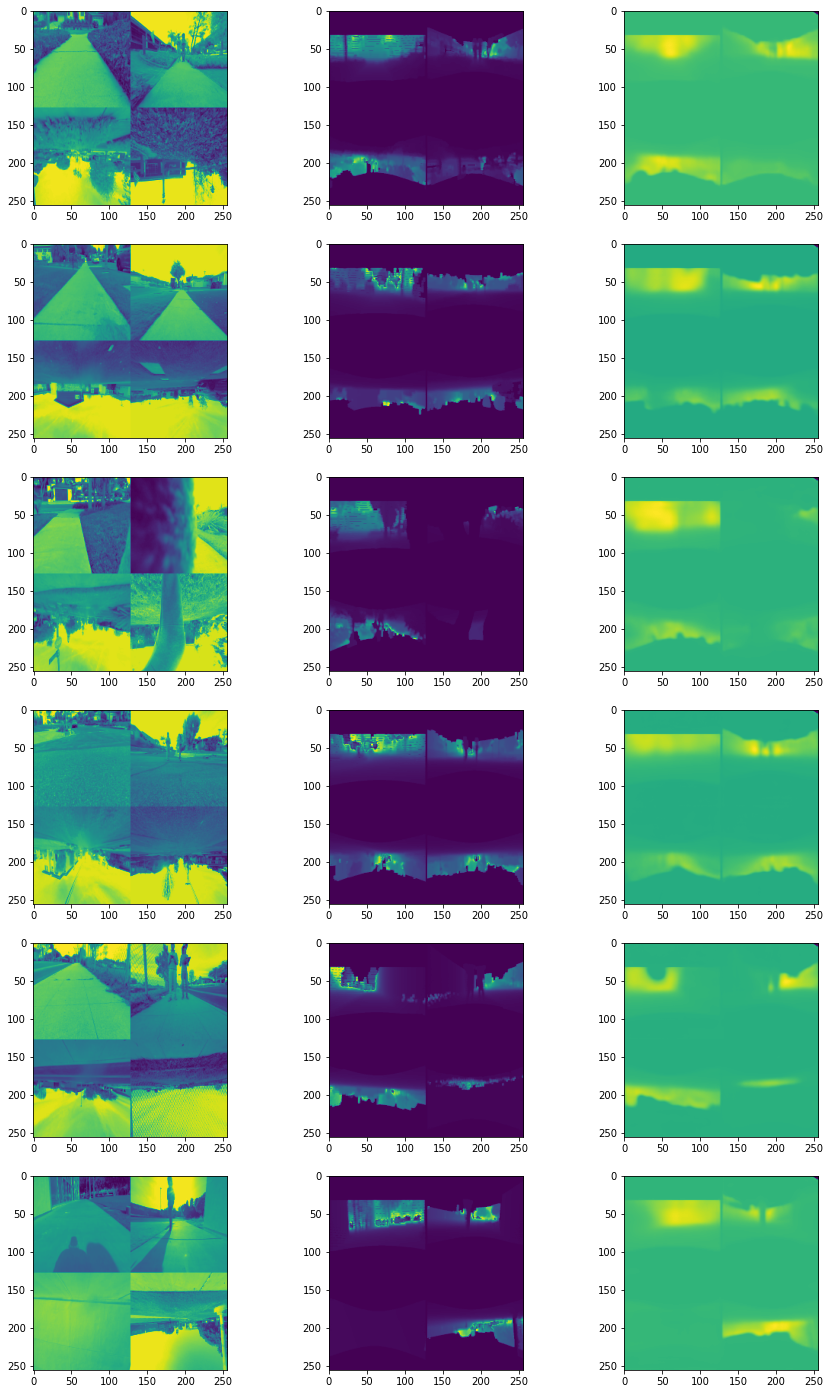

In [18]:
sample_loader = next(
    iter(
        DepthDataGenerator(
            data=test_df[:100], batch_size = 6, dim = (HEIGHT, WIDTH)
        )
    )
)   

visualize_depth_map(sample_loader, model=new_model)

# Evaluation

In [19]:
pip install sewar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sewar: filename=sewar-0.4.5-py3-none-any.whl size=10608 sha256=7ae8099046c8465d367de6442b5675b2005ab6997a15ebbde7ef51445fc7da2b
  Stored in directory: /root/.cache/pip/wheels/7a/38/6b/d066cfcb2b1c1c9b059b9ce1bdc4803b469359214e8dad4e3e
Successfully built sewar


In [20]:
#new_model=model

In [21]:
from sewar import full_ref, no_ref
from skimage import measure, metrics
import skimage
from skimage.metrics import structural_similarity as ssim

In [22]:
#Predictions
test_loader = DepthDataGenerator(data = test_df, batch_size=1, dim=(WIDTH, HEIGHT), split='test', shuffle=False)
y_pred_test = new_model.predict(test_loader)
y_pred_test = np.where(y_pred_test<0, 0, y_pred_test)

In [23]:
#Ground Truth
test_loader_gt = next(iter(DepthDataGenerator(data = test_df, dim=(WIDTH, HEIGHT), batch_size=len(test_df) ,split='train', shuffle=False)))

In [27]:
ssim_const = ssim(test_loader_gt[1], y_pred_test,
                  data_range=test_loader_gt[1].max() - test_loader_gt[1].min(), multichannel=True])

ValueError: ignored

In [25]:
mean_squared_error = skimage.metrics.mean_squared_error(test_loader_gt[1], y_pred_test)
rmse = skimage.metrics.normalized_root_mse(test_loader_gt[1], y_pred_test)


In [26]:
print("RMSE :", rmse)
print("SSIM Measure: ",ssim_const)

RMSE : 0.4800757838711079
SSIM Measure:  0.8789737570081263


In [16]:
print("About shapes: ")
print("GT shape: ", test_loader_gt[1].shape)
print("Preds shape: ", y_pred_test.shape)

About shapes: 


NameError: ignored

# THE END ! 
#G. Bastian Notebook

# Documentation

https://arxiv.org/pdf/1605.02305.pdf

In [ ]:
https://arxiv.org/pdf/1811.06152v1.pdf

In [ ]:
# Metrics
#https://github.com/MMehdiMousavi/AIPlayground/blob/master/Neural%20Networks/Evaluation/Evaluation.ipynb

PPT
https://app.pitch.com/app/presentation/e4f0a5a6-16fb-485c-b27b-d8b4f329290f/5fd5db99-4b15-4501-b8cd-1809c3ddfabe

# Old Classes versions

In [ ]:
class DepthDataGenerator(tf.keras.utils.Sequence):
    
  def __init__(self, data, batch_size=6, dim=(360, 640), n_channels=3, split='train', shuffle=True): #300 900
    #Parameter values: si entra
    self.data = data
    self.indices = self.data.index.tolist()
    self.dim = dim
    self.n_channels = n_channels
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.split = split
    self.on_epoch_end()

def merge_all_images(front, right, left, back, flag=None):
    #adjust front
    pxls2move=60
    
    if flag:
        if len(front.shape) == 3: 
            dummy = np.zeros((pxls2move,front.shape[1],front.shape[2]))
        else:
            dummy = np.zeros((pxls2move,front.shape[1]))

        front = front[:-pxls2move, :]
        front = np.concatenate((dummy, front), axis=0)
        
    #merge
    up_half_img = np.concatenate((front, back), axis=1)  
    down_half_img = np.concatenate((right, left), axis=1)  
    
    down_half_img = cv2.rotate(down_half_img, cv2.ROTATE_90_CLOCKWISE)
    down_half_img = cv2.rotate(down_half_img, cv2.ROTATE_90_CLOCKWISE)
    
    merged_image = np.concatenate((up_half_img, down_half_img), axis=0)
    return merged_image

  def load(self, image_path, depth_map_path = None):
    #Load & Pre process 
    image_path =  "lidar-cams-dataset/" + image_path
    
    if depth_map_path:
      depth_map_path = "lidar-cams-dataset/" + depth_map_path
    
    image_ = cv2.imread(image_path)
    image_ = cv2.cvtColor(image_, cv2.COLOR_BGR2RGB)

    
    if (self.split == 'train' or self.split == 'val'):
      #depthmap = np.load(depth_map_path)['arr_0']
      #Enhacement_1
      depth_map = cv2.imread(depth_map_path ,cv2.IMREAD_GRAYSCALE)
      depth_map = np.array(depth_map)/255.0
        
      if ((self.dim[0] < image_.shape[0]) and (self.dim[1] < image_.shape[1]) and False):
        #crop randomly at the center
        max_x = image_.shape[1] - self.dim[1]
        max_y = image_.shape[0] - self.dim[0]
        
        x = np.random.randint(0, max_x)
        y = np.random.randint(0, max_y)

        image_ = image_[y: y + self.dim[0], x: x + self.dim[1]]
        depth_map = depth_map[y: y + self.dim[0], x: x + self.dim[1]]
      
      else:
        #resize image
        depth_map = cv2.resize(depth_map, self.dim)
        image_ = cv2.resize(image_, self.dim)     

      #expand to make single channel depth map
      depth_map = np.expand_dims(depth_map, axis=2)
      
      #convert to tensor
      image_ = tf.image.convert_image_dtype(image_, tf.float32)
      depth_map = tf.image.convert_image_dtype(depth_map, tf.float32)
      return image_, depth_map

    else:
      image_= cv2.resize(image_, self.dim)
      #no depth maps for test
      image_ = tf.image.convert_image_dtype(image_, tf.float32)
      
      return image_

  def data_generation(self, batch):
    #pdb.set_trace()
    x = np.empty((self.batch_size, *self.dim, self.n_channels))
    y = np.empty((self.batch_size, *self.dim, 1))
    

    if self.split == 'train' or self.split == 'val':
      #load data from batches
      for i, batch_id in enumerate(batch):
        x[i,], y[i,] = self.load(
          self.data["left_image"][batch_id], #modificar
          self.data["left_depth_image"][batch_id], #modificar
          )
        
        #cmap = plt.cm.jet
        #cmap.set_bad(color="black")
        #plt.imshow(x[0].squeeze())
        #plt.imshow(y[0].squeeze(), cmap=cmap)
      return x, y
    
    else:
      #test:
      for i, batch_id in enumerate(batch):
        x[i,] = self.load(
          self.data["left_image"][batch_id], #modificar
        )
      return x
        
  def on_epoch_end(self):
    #shuffle dataset after every epoch
    self.index = np.arange(len(self.indices))
    if self.shuffle == True:
      np.random.shuffle(self.index)
          
  def __len__(self):
    return int(np.ceil(len(self.data) / self.batch_size))

  def __getitem__(self, index):
    #pdb.set_trace()
    if (index + 1)*self.batch_size > len(self.indices):
      self.batch_size = len(self.indices) - index*self.batch_size
        
    #generate indices of the batch
    index = self.indices[index*self.batch_size: (index+1)*self.batch_size]

    #find list of IDs and get data using data generation fucntion
    batch = [self.indices[k] for k in index] #index 
    
    if ((self.split == 'train') or  (self.split == 'val')):
      x, y = self.data_generation(batch)
      plt.imshow(x[0].squeeze())
      #cmap = plt.cm.jet
      #cmap.set_bad(color="black")
      #plt.imshow(y[0].squeeze(), cmap=cmap)
      return x, y
    
    elif (self.split == 'get_gt'):
      x, y = self.data_generation(batch)
      #cmap = plt.cm.jet
      #cmap.set_bad(color="black")
      #plt.imshow(y[0].squeeze(), cmap=cmap)
      return y

    else:
      #no depth maps for test
      x=self.data_generation(batch)
      return x
      